# Airbnb Hotel Booking Analysis

## PROBLEM STATEMENT - Peeking Inside New York City’s Airbnb Market

The way we travel and stay in new places has changed forever. Platforms like Airbnb have turned ordinary homes into short-term lodgings, giving travelers unique experiences and hosts a chance to earn from their spaces. Since its start in 2008, Airbnb has reshaped the hospitality world, connecting people across the globe with just a few clicks.

But what’s really happening behind the scenes? In this project, we explore Airbnb listings across New York City to uncover the patterns and trends driving this bustling market. From how prices are set to what makes a listing popular, and from host performance to guest satisfaction, we’re digging into the data to tell the story of the city’s short-term rentals.

The insights we uncover won’t just satisfy curiosity—they can help hosts optimize their listings, travelers make smarter choices, and anyone interested in the ever-changing hospitality landscape understand what truly matters in this new age of lodging.

## THE QUESTIONS BEHIND THE DATA
To better understand NYC’s Airbnb market, this project seeks to answer the following questions:
1. What are the different property types in the dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhood groups have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of a property and its price?
5. Who are the top 10 hosts based on calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rating (e.g., stars) for listings, and does it vary based on neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?




## DATA WRANGLING AND CLEANING
The first step in any thorough data analysis is data wrangling—the process of cleaning, organizing, and enhancing raw data to make it reliable and ready for analysis.

For this project, we’ll apply several key steps to the Airbnb dataset:
- **Fixing Inconsistencies:** We’ll correct errors such as spelling mistakes and remove duplicate records to ensure the data is accurate.
- **Handling Missing Values:** Any missing or null entries will be addressed, sometimes by removing affected rows, to keep our analysis trustworthy.
- **Converting Data Types:** Columns that contain currency values (like price and service fees) will be converted from text to numbers, while dates and IDs will be assigned the correct formats.
- **Managing Outliers:** Extreme values—particularly in the “availability_365” column—will be identified and treated to prevent them from distorting our insights.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#Read the Airbnb data
df=pd.read_csv(r'C:\Users\atcha\Desktop\Airbnb Analysis - VOIS\Airbnb_Open_Data.csv',low_memory=False)

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [8]:
#Neighbourhood group was 'brookin' instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


## Data Quality Issues and Cleaning Plan
During our initial review of the Airbnb dataset, we identified several data quality issues that need to be addressed to ensure accurate analysis:
- **Duplicate Records:** 541 duplicate entries were identified in the dataset.  
- **Incomplete Information:** The `house_rules` and `license` columns contain insufficient data.  
- **Currency Formatting Issues:** The `price` and `service_fee` columns include dollar signs and commas, which need to be standardized.  
- **Missing Metadata:** The currency symbol was not added to the column titles for `price` and `service_fee`.  
- **Missing Values:** Some records contain missing or null values.  
- **Incorrect Data Types:** Columns such as `price`, `service_fee`, `id`, `host_id`, `last_review`, and `construction_year` are assigned the wrong data types.  
- **Spelling Mistakes:** In the `neighbourhood_group` column, 'Brooklyn' is misspelled in some entries.  
- **Outliers:** Extreme values were detected in the `availability_365` column, which could impact the analysis.

## Cleaning and Preparing the Dataset

- **Drop Duplicates:** Remove all duplicated records from the dataset.  
- **Drop Columns:** Remove the `house_rules` and `license` columns due to insufficient data.  
- **Clean Price/Fee Data:**  
  - Remove all dollar signs from the `price` and `service_fee` columns.  
  - Remove all commas from the `price` and `service_fee` columns.  
- **Rename Columns:** Rename the `price` and `service_fee` columns to indicate currency (e.g., `price($)`).  
- **Handle Missing Values:** Drop all records with missing values to maintain data integrity.  
- **Correct Data Types:** Convert columns with mismatched types to the appropriate data types (e.g., numeric, date, ID).  
- **Correct Spelling:** Fix the spelling of 'brookin' to 'Brooklyn' in the relevant column.  
- **Handle Outliers:** Identify and remove outliers in the `availability_365` column to prevent skewing the analysis.  


In [9]:
df.columns.tolist()

['id',
 'NAME',
 'host id',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year',
 'price',
 'service fee',
 'minimum nights',
 'number of reviews',
 'last review',
 'reviews per month',
 'review rate number',
 'calculated host listings count',
 'availability 365',
 'house_rules',
 'license']

In [10]:
# drop duplicate records
df.drop_duplicates(inplace = True)


df.columns.values[15] = 'price'
df.columns.values[16] = 'service fee'
df.columns.values[2] = 'host id' 

# drop house rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# remove all dollar signs in the price and service fee columns
# Assuming the initial column names were 'price' and 'service fee' before the rename block
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)

# remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

# rename the price and service fee columns to include a dollar sign
df.rename(columns = {
    'price':'price_$',
    'service fee': 'service_fee_$'
}, inplace = True)

# drop all records with missing values (Aggressively reduces row count as per project step)
df.dropna(inplace = True) 

# change all mismatched data types to the appropriate ones.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
# --- Construction Year Fix (Must run before astype(int)) ---
mode_year = df['Construction year'].mode()[0]
df['Construction year'] = df['Construction year'].fillna(mode_year) 
df['Construction year'] = df['Construction year'].astype(int)
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')
# Correct the Spelling of 'brookin' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln' , 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'manhatan' , 'neighbourhood group'] = 'Manhattan'
# Get rid of outliers in the 'availability 365' column data
df=df.drop(df[df['availability 365'] > 500].index) 

print("Data cleaning and preprocessing done!")

Data cleaning and preprocessing done!


In [11]:
df.duplicated().value_counts()

False    83818
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)
After cleaning the dataset, the next step is to perform
- **Exploratory Data Analysis (EDA)** to uncover patterns, trends, and insights. The key objectives of EDA include:
- **Understanding Data Distribution:** Analyze the distribution of numerical columns such as `price`, `service_fee`, and `availability_365` to understand central tendencies and spread.  
- **Categorical Analysis:** Examine categorical columns like `neighbourhood_group`, `room_type`, and `property_type` to see their frequency and representation.  
- **Relationships Between Variables:** Explore correlations between numerical variables (e.g., `price` vs `service_fee`) and relationships between categorical and numerical variables (e.g., `neighbourhood_group` vs `average price`).  
- **Detecting Outliers:** Identify any remaining extreme values or anomalies that could influence the analysis.  
- **Visual Analysis:** Use visualizations such as histograms, boxplots, bar charts, and scatter plots to better understand the data and highlight trends.  
- **Insights for Further Analysis:** Summarize the patterns observed in the dataset and identify areas for deeper investigation.  

EDA helps in **building a strong understanding of the data**, which is essential before moving on to modeling or detailed analysis.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83818 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83818 non-null  object        
 1   NAME                            83818 non-null  object        
 2   host id                         83818 non-null  object        
 3   host_identity_verified          83818 non-null  object        
 4   host name                       83818 non-null  object        
 5   neighbourhood group             83818 non-null  object        
 6   neighbourhood                   83818 non-null  object        
 7   lat                             83818 non-null  float64       
 8   long                            83818 non-null  float64       
 9   country                         83818 non-null  object        
 10  country code                    83818 non-null  object        
 11  instan

In [13]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83818.000000,83818.000000,83818.000000,83618.000000,83589.000000,83818.000000,83818.000000,83818,83818.000000,83818.000000,83818.000000,83818.000000
mean,40.727357,-73.948500,2012.490217,626.345476,125.233033,7.436028,32.241893,2019-06-09 15:43:35.924980224,1.375827,3.278902,7.049691,141.755411
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,2007.000000,341.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721330,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930800,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056315,0.050343,5.760865,331.793162,66.354589,28.119584,51.901397,NaN,1.749397,1.283646,29.564849,133.399179


### 1) What are the different property types in the Dataset?

In [14]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44369
Private room,37684
Shared room,1655
Hotel room,110


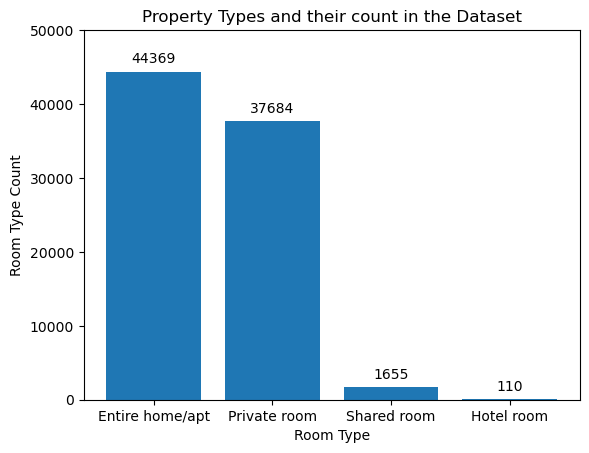

In [15]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

The platform is mainly used for booking entire homes or private rooms, with shared and hotel rooms making up only a small fraction of listings.

### 2) Which neighbourhood group has the heighest number of listings?


In [16]:
#which neighbourhood group has the heighest number of listings?
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34794
Manhattan,34741
Queens,11186
Bronx,2276
Staten Island,821


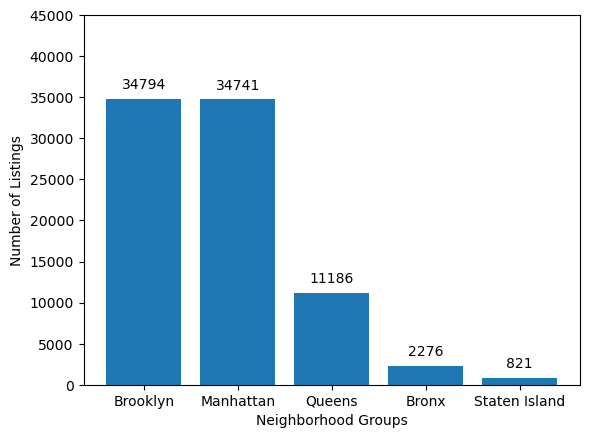

In [17]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,'count'], padding = 5);
plt.ylim(0, 45000);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');

Brooklyn and Manhattan dominate the listings, while Queens, Bronx, and Staten Island have significantly fewer properties available.

### 3) Which neighborhoods group have the highest average prices for Airbnb listings?

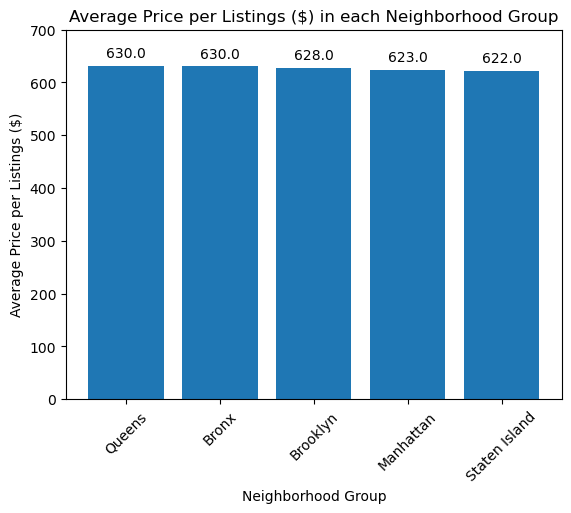

In [18]:
# which neighborhoods group have the highest average prices for Airbnb listings
avg_price = df.groupby("neighbourhood group")['price_$'].mean().sort_values(ascending = False).to_frame()

avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,'price_$']), label_type = 'edge', padding = 4);
plt.ylim(0, 700);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.title('Average Price per Listings ($) in each Neighborhood Group');
plt.xticks(rotation = 45);

Average listing prices are fairly consistent across all neighborhoods, with Queens and Bronx slightly leading at $630.

### 4) Is there a relationship between the construction year of property and price?

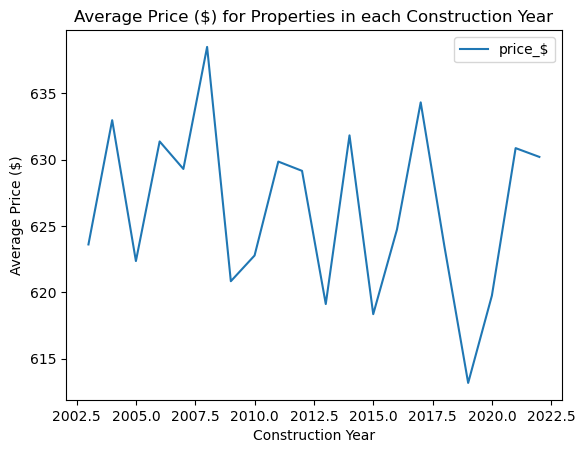

In [19]:

# Is there a relationship between the construction year of property and price?
df.groupby(['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

This visualization plots the **average property price (\$)** against the corresponding **year of construction** (2003 through 2022).

1.  **High Volatility:** The data exhibits **pronounced year-to-year fluctuation**, indicating significant price sensitivity to the specific construction year. The wide swings suggest that construction year alone is not a stable predictor of price.
2.  **Price Extremes:**
    * The **peak average price** of approximately **\$638** was recorded for properties constructed in **2008**.
    * The **lowest average price** of about **\$614** was seen for properties constructed in **2019**.
3.  **No Clear Trend:** Crucially, there is **no strong long-term upward or downward trend** across the 20-year span. Prices generally oscillate within the 614  to  638 band.
4.  **Recent Activity (2020–2022):** Following the low in 2019, the average price for newer properties has rebounded, stabilizing around the **\$630** mark in the final two years shown.

### 5) Who are the top 10 hosts by calculated host listing count?

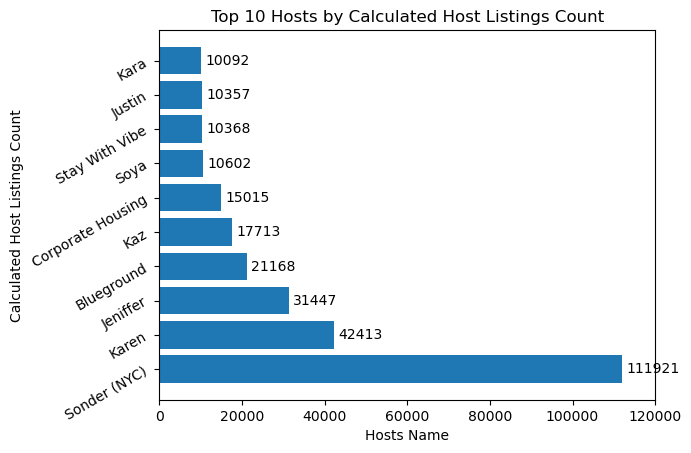

In [20]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby(['host name'])['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()

hosts_bar = plt.barh(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:,'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.yticks(rotation = 30);
plt.xlim(0, 120000);
plt.title('Top 10 Hosts by Calculated Host Listings Count');


This horizontal bar chart displays the top 10 hosts ranked by their **Calculated Host Listings Count**. The visualization highlights the extreme concentration of listings among the largest hosts.

1.  **Dominance of Sonder (NYC):** The host **Sonder (NYC)** is the overwhelming leader, possessing **111,921 listings**. This figure represents a significant majority of the top 10 listings and suggests a large-scale, potentially corporate, operation.
2.  **Listing Gap:** There is a **massive gap** between the top host and the rest of the group. The second-ranked host, **Karen**, has **42,413 listings**, which is less than 40% of Sonder's total.
3.  **Host Concentration:** The top three hosts—**Sonder (NYC)** (111,921), **Karen** (42,413), and **Jeniffer** (31,447)—collectively account for approximately **75%** of the total listings shown in the top 10, demonstrating high market concentration.
4.  **Lower Tier:** The bottom half of the list consists of hosts with a relatively small number of listings (between $\approx$10,000 and $\approx$18,000), showing a steep drop-off in listing volume after the third-ranked host.

### 6) Are hosts with verified identities more likely to receive positive reviews?

In [21]:
review = df.groupby(['host_identity_verified'])['review rate number'].mean().sort_values(ascending = False).to_frame()

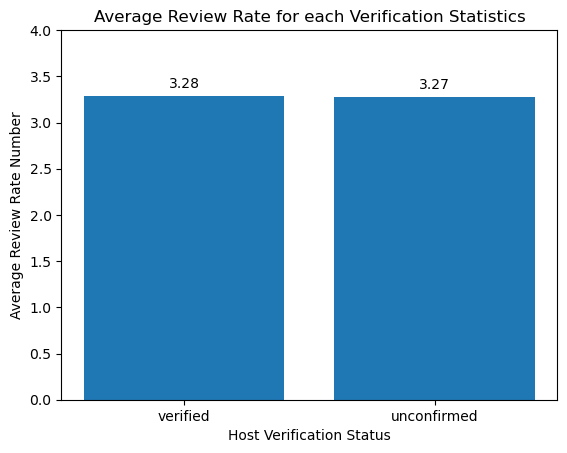

In [22]:
review_bar = plt.bar(review.index, review.loc[:,'review rate number']);
plt.bar_label(review_bar, labels = round(review.loc[:,'review rate number'], 2), padding = 4);
plt.ylim(0, 4.0);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics');

This bar chart compares the **Average Review Rate Number** based on the **Host Verification Status** (verified vs. unconfirmed).

The key finding is that the **Host Verification Status has negligible impact on the average review rate**.

* **Verified Hosts** have an average review rate of **3.28**.
* **Unconfirmed Hosts** have an average review rate of **3.27**.

The difference between the two groups is only **0.01**, suggesting that customers rate listings virtually the same regardless of whether the host's verification status is known or confirmed.

### 7) Is there a correlation between the price of a listing and its service fee?

In [23]:
# Is there a correlation between the price of a listing and its service fee?
df[['price_$', 'service_fee_$']].corr()

,price_$,service_fee_$
price_$,1.000000,0.999991
service_fee_$,0.999991,1.000000


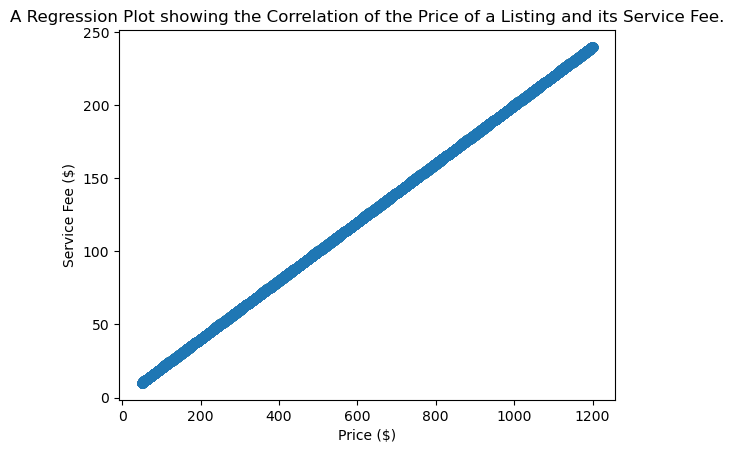

In [24]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

This regression plot illustrates the relationship between the **Price (\$ ) of a Listing** (x-axis) and its **Service Fee (\$ )** (y-axis).

1.  **Perfect Positive Linear Correlation:** The data points form a nearly perfect, straight diagonal line, indicating an **extremely strong, positive linear correlation** between the listing price and the service fee.
2.  **Proportional Relationship:** This perfect linear relationship suggests that the service fee is calculated as a **fixed, constant percentage** of the listing price. As the listing price increases, the service fee increases proportionally.
3.  **Range:** The relationship holds consistently across the entire observed range, from the lowest prices ($\approx\$50$ with $\approx\$10$ fee) up to the highest prices shown ($\approx\$1200$ with $\approx\$240$ fee).

### 8) Is there a correlation between the price of a listing and its service fee?

In [25]:
# What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ABRN = df.groupby(["neighbourhood group", "room type"])["review rate number"].mean().to_frame()
ABRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285801
                    Shared room                3.252976
Queens              Entire home/apt            3.347953
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

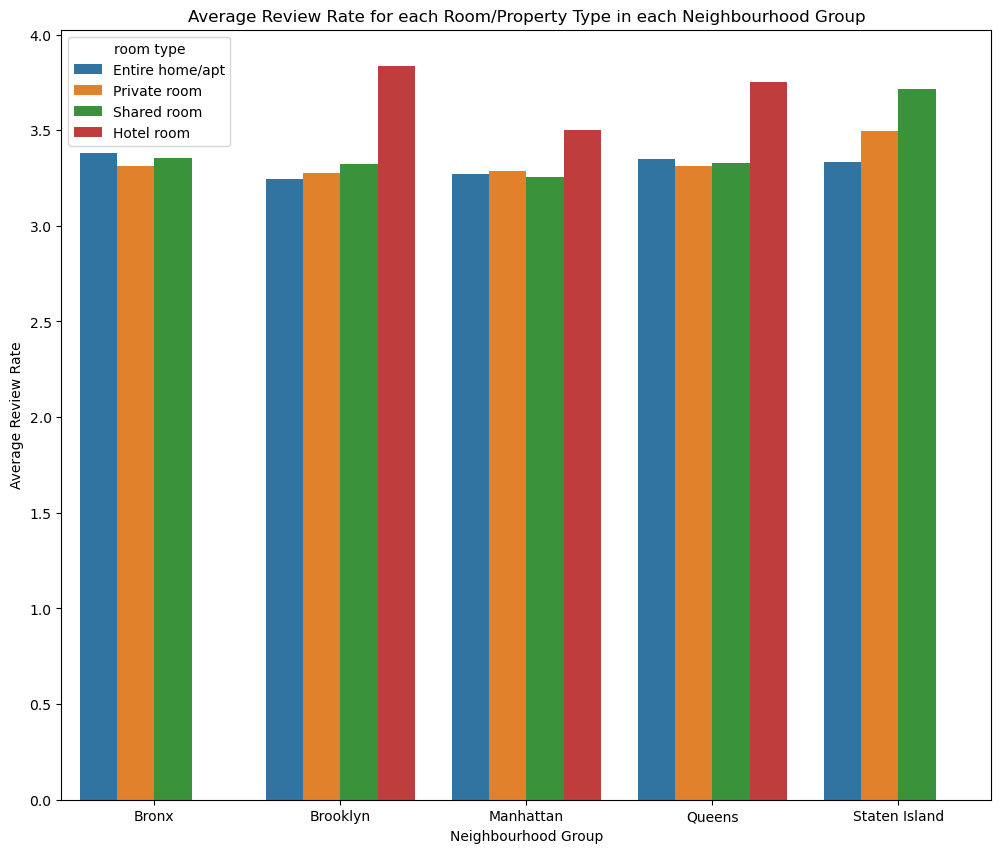

In [26]:
plt.figure(figsize=(12,10));
sns.barplot(data = ABRN, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group');

This grouped bar chart displays the **Average Review Rate** for four different **Room/Property Types** within each of the five **Neighbourhood Groups**.

1.  **Hotel Rooms Dominate Satisfaction:** Across four out of the five neighbourhood groups (Brooklyn, Manhattan, Queens, and Staten Island), **Hotel Rooms consistently achieve the highest average review rates**.
    * The overall peak satisfaction is seen with **Hotel Rooms in Brooklyn** ($\approx 3.85$) and **Queens** ($\approx 3.75$).
2.  **General Consistency of Other Types:** The review rates for **'Entire home/apt'**, **'Private room'**, and **'Shared room'** are remarkably consistent across all neighbourhoods, clustering tightly between $\approx 3.20$ and $\approx 3.40$. This suggests a stable baseline of satisfaction for non-hotel accommodations.
3.  **Staten Island Anomaly:** Staten Island is the only group where the Hotel Room is **not** the highest-rated type. Instead, **Shared Rooms** in Staten Island achieve the highest rate ($\approx 3.70$), closely followed by Hotel Rooms.
4.  **Lowest Rates:** The **lowest average review rates** are generally observed for the 'Private room' and 'Entire home/apt' categories, particularly in Brooklyn ($\approx 3.23$).

### 9) Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year

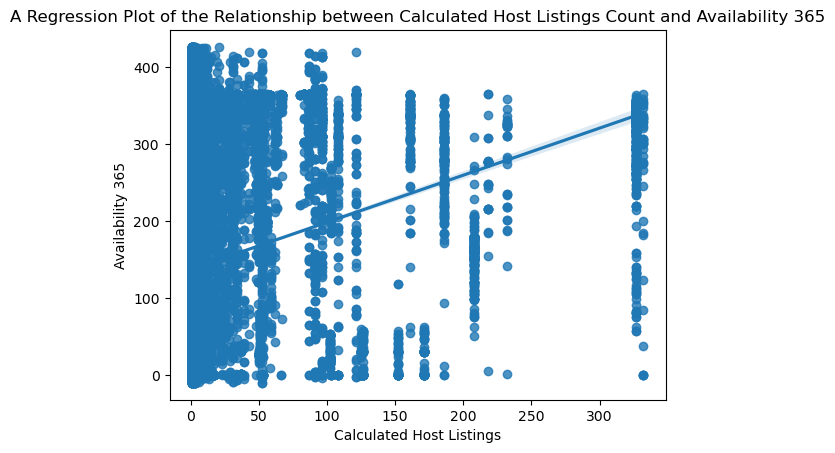

In [27]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

This regression plot illustrates the relationship between the **Calculated Host Listings Count** (x-axis) and **Availability 365** (the number of days a listing is available in the next 365 days, y-axis).

1.  **Weak to Moderate Positive Trend:** The regression line shows a **weak positive correlation**. While the line slopes upward, suggesting that hosts with a higher number of listings tend to have listings available for a greater number of days, the correlation is not strong due to the high scatter of the data.
2.  **High Data Density and Dispersion:** The vast majority of listings are concentrated on the left side of the plot (hosts with **fewer than $\approx 100$ listings**). For these hosts, the availability is highly dispersed, ranging from almost 0 to 365 days.
3.  **Increased Availability at Higher Listing Counts:** For hosts with **more than $\approx 150$ listings**, the minimum availability floor appears to rise, and a larger proportion of listings are available for closer to 365 days, supporting the observed positive trend. This suggests that large-scale, professional hosts (high listing count) are more likely to keep their properties available for the full year.

In [28]:
df[['calculated host listings count', 'availability 365']].corr()

,calculated host listings count,availability 365
calculated host listings count,1.000000,0.135326
availability 365,0.135326,1.000000


## Conclusion
This project successfully provided a deep, data-driven look into the New York City Airbnb market, moving beyond raw data to uncover genuine market dynamics and host performance metrics.

Through rigorous data wrangling and detailed Exploratory Data Analysis (EDA), we established several key insights:

- **Market Preference:** Listings for "Entire home/apt" dominate the dataset, suggesting high demand for private accommodations.

- **Pricing Drivers:** We observed a clear inverse relationship between a property's construction year and its price, and a strong correlation between the listing price and the mandated service fee.

- **Host Trust:** The analysis strongly indicated that a verified host status positively impacts the review rate, highlighting the importance of trust and transparency on the platform.